In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d paramaggarwal/fashion-product-images-small

100% 564M/565M [00:19<00:00, 33.5MB/s]
100% 565M/565M [00:19<00:00, 30.0MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fashion-product-images-small.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Importing Libraries
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import GlobalMaxPooling2D
from keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
from numpy.linalg import norm
import os
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import pickle

In [ ]:
# Used ResNet50 - Transfer Learning
model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
# Add Maxpooling layer at the end
model = tensorflow.keras.Sequential([model,GlobalMaxPooling2D()])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Glob  (None, 2048)              0         
 alMaxPooling2D)                                                 
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
# Function for extract features from images
def extract_features(img_path,model):
  img = image.load_img(img_path,target_size=(224,224))
  img_array = image.img_to_array(img)
  expanded_img_array = np.expand_dims(img_array,axis=0)
  preprocessed_img = preprocess_input(expanded_img_array)
  result = model.predict(preprocessed_img).flatten()
  normalized_result = result/norm(result)
  return normalized_result

In [ ]:
os.listdir('images')

['49149.jpg',
 '6006.jpg',
 '49324.jpg',
 '37551.jpg',
 '56843.jpg',
 '48969.jpg',
 '42582.jpg',
 '55519.jpg',
 '35703.jpg',
 '15920.jpg',
 '47311.jpg',
 '5154.jpg',
 '33927.jpg',
 '10784.jpg',
 '34246.jpg',
 '17062.jpg',
 '54584.jpg',
 '46815.jpg',
 '8928.jpg',
 '17983.jpg',
 '33092.jpg',
 '12995.jpg',
 '6063.jpg',
 '40291.jpg',
 '15197.jpg',
 '47881.jpg',
 '50876.jpg',
 '4678.jpg',
 '17707.jpg',
 '54663.jpg',
 '9481.jpg',
 '11406.jpg',
 '34058.jpg',
 '31849.jpg',
 '23809.jpg',
 '42202.jpg',
 '53090.jpg',
 '2912.jpg',
 '45826.jpg',
 '38034.jpg',
 '11850.jpg',
 '40407.jpg',
 '47177.jpg',
 '26866.jpg',
 '48508.jpg',
 '15688.jpg',
 '43691.jpg',
 '55161.jpg',
 '31103.jpg',
 '54683.jpg',
 '45238.jpg',
 '14675.jpg',
 '29895.jpg',
 '6533.jpg',
 '9106.jpg',
 '5243.jpg',
 '11960.jpg',
 '33741.jpg',
 '16785.jpg',
 '27850.jpg',
 '9024.jpg',
 '39990.jpg',
 '34082.jpg',
 '8306.jpg',
 '9696.jpg',
 '45330.jpg',
 '56955.jpg',
 '59720.jpg',
 '12153.jpg',
 '31123.jpg',
 '50395.jpg',
 '29292.jpg',
 '412

In [ ]:
len(os.listdir('images'))

44441

In [ ]:
# Function for file path - filenames
filenames = []

for file in os.listdir('images'):
  filenames.append(os.path.join('images',file))

len(filenames)

44441

In [ ]:
filenames[0:5]

['images/49149.jpg',
 'images/6006.jpg',
 'images/49324.jpg',
 'images/37551.jpg',
 'images/56843.jpg']

In [ ]:
# Extract features from 1000 images
feature_list = []
for file in tqdm(filenames[0:500]):
    feature_list.append(extract_features(file, model))

  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


  0%|          | 1/500 [00:01<13:01,  1.57s/it]

1/1 [==============================] - 0s 204ms/step


  0%|          | 2/500 [00:01<07:09,  1.16it/s]

1/1 [==============================] - 0s 217ms/step


  1%|          | 3/500 [00:02<04:53,  1.69it/s]

1/1 [==============================] - 0s 174ms/step


  1%|          | 4/500 [00:02<04:09,  1.99it/s]

1/1 [==============================] - 0s 174ms/step


  1%|          | 5/500 [00:02<03:21,  2.46it/s]

1/1 [==============================] - 0s 177ms/step


  1%|          | 6/500 [00:03<02:55,  2.82it/s]

1/1 [==============================] - 0s 180ms/step


  1%|▏         | 7/500 [00:03<02:35,  3.17it/s]

1/1 [==============================] - 0s 180ms/step


  2%|▏         | 8/500 [00:03<02:23,  3.44it/s]

1/1 [==============================] - 0s 173ms/step


  2%|▏         | 9/500 [00:03<02:13,  3.69it/s]

1/1 [==============================] - 0s 183ms/step


  2%|▏         | 10/500 [00:04<02:07,  3.83it/s]

1/1 [==============================] - 0s 177ms/step


  2%|▏         | 11/500 [00:04<02:03,  3.97it/s]

1/1 [==============================] - 0s 186ms/step


  2%|▏         | 12/500 [00:04<02:02,  3.99it/s]

1/1 [==============================] - 0s 184ms/step


  3%|▎         | 13/500 [00:04<02:00,  4.04it/s]

1/1 [==============================] - 0s 198ms/step


  3%|▎         | 14/500 [00:04<02:01,  4.00it/s]

1/1 [==============================] - 0s 289ms/step


  3%|▎         | 15/500 [00:05<02:19,  3.48it/s]

1/1 [==============================] - 0s 301ms/step


  3%|▎         | 16/500 [00:05<02:32,  3.16it/s]

1/1 [==============================] - 0s 314ms/step


  3%|▎         | 17/500 [00:06<02:45,  2.92it/s]

1/1 [==============================] - 0s 301ms/step


  4%|▎         | 18/500 [00:06<02:49,  2.85it/s]

1/1 [==============================] - 0s 310ms/step


  4%|▍         | 19/500 [00:06<02:57,  2.71it/s]

1/1 [==============================] - 0s 340ms/step


  4%|▍         | 20/500 [00:07<03:06,  2.58it/s]

1/1 [==============================] - 0s 301ms/step


  4%|▍         | 21/500 [00:07<03:07,  2.55it/s]

1/1 [==============================] - 0s 277ms/step


  4%|▍         | 22/500 [00:08<03:01,  2.64it/s]

1/1 [==============================] - 0s 177ms/step


  5%|▍         | 23/500 [00:08<02:39,  2.99it/s]

1/1 [==============================] - 0s 190ms/step


  5%|▍         | 24/500 [00:08<02:27,  3.23it/s]

1/1 [==============================] - 0s 180ms/step


  5%|▌         | 25/500 [00:08<02:36,  3.04it/s]

1/1 [==============================] - 0s 196ms/step


  5%|▌         | 26/500 [00:09<02:42,  2.91it/s]

1/1 [==============================] - 0s 200ms/step


  5%|▌         | 27/500 [00:09<02:29,  3.15it/s]

1/1 [==============================] - 0s 178ms/step


  6%|▌         | 28/500 [00:09<02:37,  3.00it/s]

1/1 [==============================] - 0s 208ms/step


  6%|▌         | 29/500 [00:10<02:26,  3.21it/s]

1/1 [==============================] - 0s 180ms/step


  6%|▌         | 30/500 [00:10<02:15,  3.46it/s]

1/1 [==============================] - 0s 179ms/step


  6%|▌         | 31/500 [00:10<02:07,  3.67it/s]

1/1 [==============================] - 0s 181ms/step


  6%|▋         | 32/500 [00:11<02:21,  3.30it/s]

1/1 [==============================] - 0s 179ms/step


  7%|▋         | 33/500 [00:11<02:11,  3.54it/s]

1/1 [==============================] - 0s 177ms/step


  7%|▋         | 34/500 [00:11<02:04,  3.74it/s]

1/1 [==============================] - 0s 171ms/step


  7%|▋         | 35/500 [00:11<01:58,  3.93it/s]

1/1 [==============================] - 0s 175ms/step


  7%|▋         | 36/500 [00:11<01:53,  4.07it/s]

1/1 [==============================] - 0s 195ms/step


  7%|▋         | 37/500 [00:12<01:53,  4.06it/s]

1/1 [==============================] - 0s 170ms/step


  8%|▊         | 38/500 [00:12<01:50,  4.19it/s]

1/1 [==============================] - 0s 212ms/step


  8%|▊         | 39/500 [00:12<01:53,  4.05it/s]

1/1 [==============================] - 0s 326ms/step


  8%|▊         | 40/500 [00:13<02:23,  3.20it/s]

1/1 [==============================] - 0s 314ms/step


  8%|▊         | 41/500 [00:13<02:36,  2.93it/s]

1/1 [==============================] - 0s 317ms/step


  8%|▊         | 42/500 [00:14<03:32,  2.15it/s]

1/1 [==============================] - 0s 298ms/step


  9%|▊         | 43/500 [00:14<03:24,  2.24it/s]

1/1 [==============================] - 0s 401ms/step


  9%|▉         | 44/500 [00:15<04:03,  1.87it/s]

1/1 [==============================] - 0s 350ms/step


  9%|▉         | 45/500 [00:15<03:51,  1.96it/s]

1/1 [==============================] - 0s 408ms/step


  9%|▉         | 46/500 [00:16<03:54,  1.93it/s]

1/1 [==============================] - 0s 329ms/step


  9%|▉         | 47/500 [00:17<03:55,  1.92it/s]

1/1 [==============================] - 0s 325ms/step


 10%|▉         | 48/500 [00:17<03:54,  1.92it/s]

1/1 [==============================] - 0s 313ms/step


 10%|▉         | 49/500 [00:17<03:36,  2.08it/s]

1/1 [==============================] - 0s 359ms/step


 10%|█         | 50/500 [00:18<04:08,  1.81it/s]

1/1 [==============================] - 1s 567ms/step


 10%|█         | 51/500 [00:19<04:45,  1.58it/s]

1/1 [==============================] - 1s 545ms/step


 10%|█         | 52/500 [00:20<05:09,  1.45it/s]

1/1 [==============================] - 1s 515ms/step


 11%|█         | 53/500 [00:20<05:11,  1.43it/s]

1/1 [==============================] - 1s 532ms/step


 11%|█         | 54/500 [00:21<05:21,  1.39it/s]

1/1 [==============================] - 0s 264ms/step


 11%|█         | 55/500 [00:22<04:45,  1.56it/s]

1/1 [==============================] - 0s 334ms/step


 11%|█         | 56/500 [00:22<04:18,  1.72it/s]

1/1 [==============================] - 0s 311ms/step


 11%|█▏        | 57/500 [00:23<03:54,  1.89it/s]

1/1 [==============================] - 0s 300ms/step


 12%|█▏        | 58/500 [00:23<03:34,  2.06it/s]

1/1 [==============================] - 0s 359ms/step


 12%|█▏        | 59/500 [00:24<04:25,  1.66it/s]

1/1 [==============================] - 0s 231ms/step


 12%|█▏        | 60/500 [00:24<04:02,  1.82it/s]

1/1 [==============================] - 0s 169ms/step


 12%|█▏        | 61/500 [00:24<03:17,  2.22it/s]

1/1 [==============================] - 0s 172ms/step


 12%|█▏        | 62/500 [00:25<02:47,  2.62it/s]

1/1 [==============================] - 0s 176ms/step


 13%|█▎        | 63/500 [00:25<02:26,  2.98it/s]

1/1 [==============================] - 0s 187ms/step


 13%|█▎        | 64/500 [00:25<02:14,  3.25it/s]

1/1 [==============================] - 0s 175ms/step


 13%|█▎        | 65/500 [00:25<02:03,  3.51it/s]

1/1 [==============================] - 0s 175ms/step


 13%|█▎        | 66/500 [00:26<01:56,  3.71it/s]

1/1 [==============================] - 0s 174ms/step


 13%|█▎        | 67/500 [00:26<01:51,  3.88it/s]

1/1 [==============================] - 0s 172ms/step


 14%|█▎        | 68/500 [00:26<01:46,  4.05it/s]

1/1 [==============================] - 0s 186ms/step


 14%|█▍        | 69/500 [00:26<01:45,  4.09it/s]

1/1 [==============================] - 0s 171ms/step


 14%|█▍        | 70/500 [00:27<01:42,  4.21it/s]

1/1 [==============================] - 0s 175ms/step


 14%|█▍        | 71/500 [00:27<01:40,  4.27it/s]

1/1 [==============================] - 0s 173ms/step


 14%|█▍        | 72/500 [00:27<01:39,  4.30it/s]

1/1 [==============================] - 0s 187ms/step


 15%|█▍        | 73/500 [00:27<01:41,  4.22it/s]

1/1 [==============================] - 0s 174ms/step


 15%|█▍        | 74/500 [00:27<01:40,  4.23it/s]

1/1 [==============================] - 0s 177ms/step


 15%|█▌        | 75/500 [00:28<01:40,  4.25it/s]

1/1 [==============================] - 0s 175ms/step


 15%|█▌        | 76/500 [00:28<01:39,  4.27it/s]

1/1 [==============================] - 0s 174ms/step


 15%|█▌        | 77/500 [00:28<01:37,  4.33it/s]

1/1 [==============================] - 0s 176ms/step


 16%|█▌        | 78/500 [00:28<01:37,  4.34it/s]

1/1 [==============================] - 0s 169ms/step


 16%|█▌        | 79/500 [00:29<01:36,  4.36it/s]

1/1 [==============================] - 0s 176ms/step


 16%|█▌        | 80/500 [00:29<01:36,  4.37it/s]

1/1 [==============================] - 0s 176ms/step


 16%|█▌        | 81/500 [00:29<01:36,  4.33it/s]

1/1 [==============================] - 0s 185ms/step


 16%|█▋        | 82/500 [00:29<01:36,  4.31it/s]

1/1 [==============================] - 0s 186ms/step


 17%|█▋        | 83/500 [00:30<01:37,  4.26it/s]

1/1 [==============================] - 0s 183ms/step


 17%|█▋        | 84/500 [00:30<01:37,  4.27it/s]

1/1 [==============================] - 0s 174ms/step


 17%|█▋        | 85/500 [00:30<01:36,  4.31it/s]

1/1 [==============================] - 0s 182ms/step


 17%|█▋        | 86/500 [00:30<01:36,  4.31it/s]

1/1 [==============================] - 0s 174ms/step


 17%|█▋        | 87/500 [00:30<01:35,  4.30it/s]

1/1 [==============================] - 0s 179ms/step


 18%|█▊        | 88/500 [00:31<01:35,  4.31it/s]

1/1 [==============================] - 0s 182ms/step


 18%|█▊        | 89/500 [00:31<01:36,  4.24it/s]

1/1 [==============================] - 0s 250ms/step


 18%|█▊        | 90/500 [00:31<01:53,  3.62it/s]

1/1 [==============================] - 0s 327ms/step


 18%|█▊        | 91/500 [00:32<02:47,  2.44it/s]

1/1 [==============================] - 1s 685ms/step


 18%|█▊        | 92/500 [00:33<03:51,  1.77it/s]

1/1 [==============================] - 0s 336ms/step


 19%|█▊        | 93/500 [00:34<03:43,  1.82it/s]

1/1 [==============================] - 0s 288ms/step


 19%|█▉        | 94/500 [00:34<03:20,  2.03it/s]

1/1 [==============================] - 0s 210ms/step


 19%|█▉        | 95/500 [00:34<02:55,  2.31it/s]

1/1 [==============================] - 0s 170ms/step


 19%|█▉        | 96/500 [00:34<02:29,  2.70it/s]

1/1 [==============================] - 0s 178ms/step


 19%|█▉        | 97/500 [00:35<02:14,  3.00it/s]

1/1 [==============================] - 0s 177ms/step


 20%|█▉        | 98/500 [00:35<02:32,  2.64it/s]

1/1 [==============================] - 0s 182ms/step


 20%|█▉        | 99/500 [00:35<02:31,  2.66it/s]

1/1 [==============================] - 0s 189ms/step


 20%|██        | 100/500 [00:36<02:15,  2.96it/s]

1/1 [==============================] - 0s 181ms/step


 20%|██        | 101/500 [00:36<02:02,  3.26it/s]

1/1 [==============================] - 0s 180ms/step


 20%|██        | 102/500 [00:36<01:53,  3.50it/s]

1/1 [==============================] - 0s 182ms/step


 21%|██        | 103/500 [00:36<01:47,  3.71it/s]

1/1 [==============================] - 0s 169ms/step


 21%|██        | 104/500 [00:37<01:42,  3.88it/s]

1/1 [==============================] - 0s 174ms/step


 21%|██        | 105/500 [00:37<01:38,  4.01it/s]

1/1 [==============================] - 0s 174ms/step


 21%|██        | 106/500 [00:37<01:36,  4.07it/s]

1/1 [==============================] - 0s 178ms/step


 21%|██▏       | 107/500 [00:37<01:34,  4.15it/s]

1/1 [==============================] - 0s 184ms/step


 22%|██▏       | 108/500 [00:38<01:34,  4.16it/s]

1/1 [==============================] - 0s 175ms/step


 22%|██▏       | 109/500 [00:38<01:32,  4.22it/s]

1/1 [==============================] - 0s 175ms/step


 22%|██▏       | 110/500 [00:38<01:31,  4.25it/s]

1/1 [==============================] - 0s 177ms/step


 22%|██▏       | 111/500 [00:38<01:30,  4.29it/s]

1/1 [==============================] - 0s 179ms/step


 22%|██▏       | 112/500 [00:39<01:29,  4.32it/s]

1/1 [==============================] - 0s 172ms/step


 23%|██▎       | 113/500 [00:39<01:29,  4.35it/s]

1/1 [==============================] - 0s 176ms/step


 23%|██▎       | 114/500 [00:39<01:29,  4.32it/s]

1/1 [==============================] - 0s 177ms/step


 23%|██▎       | 115/500 [00:39<01:29,  4.33it/s]

1/1 [==============================] - 0s 176ms/step


 23%|██▎       | 116/500 [00:39<01:28,  4.34it/s]

1/1 [==============================] - 0s 197ms/step


 23%|██▎       | 117/500 [00:40<01:30,  4.25it/s]

1/1 [==============================] - 0s 175ms/step


 24%|██▎       | 118/500 [00:40<01:28,  4.30it/s]

1/1 [==============================] - 0s 175ms/step


 24%|██▍       | 119/500 [00:40<01:27,  4.34it/s]

1/1 [==============================] - 0s 175ms/step


 24%|██▍       | 120/500 [00:40<01:27,  4.34it/s]

1/1 [==============================] - 0s 179ms/step


 24%|██▍       | 121/500 [00:41<01:27,  4.34it/s]

1/1 [==============================] - 0s 172ms/step


 24%|██▍       | 122/500 [00:41<01:27,  4.34it/s]

1/1 [==============================] - 0s 175ms/step


 25%|██▍       | 123/500 [00:41<01:26,  4.35it/s]

1/1 [==============================] - 0s 177ms/step


 25%|██▍       | 124/500 [00:41<01:26,  4.35it/s]

1/1 [==============================] - 0s 177ms/step


 25%|██▌       | 125/500 [00:42<01:26,  4.33it/s]

1/1 [==============================] - 0s 183ms/step


 25%|██▌       | 126/500 [00:42<01:26,  4.30it/s]

1/1 [==============================] - 0s 171ms/step


 25%|██▌       | 127/500 [00:42<01:26,  4.34it/s]

1/1 [==============================] - 0s 176ms/step


 26%|██▌       | 128/500 [00:42<01:25,  4.36it/s]

1/1 [==============================] - 0s 171ms/step


 26%|██▌       | 129/500 [00:42<01:25,  4.36it/s]

1/1 [==============================] - 0s 183ms/step


 26%|██▌       | 130/500 [00:43<01:26,  4.28it/s]

1/1 [==============================] - 0s 170ms/step


 26%|██▌       | 131/500 [00:43<01:25,  4.32it/s]

1/1 [==============================] - 0s 170ms/step


 26%|██▋       | 132/500 [00:43<01:24,  4.36it/s]

1/1 [==============================] - 0s 176ms/step


 27%|██▋       | 133/500 [00:43<01:24,  4.37it/s]

1/1 [==============================] - 0s 174ms/step


 27%|██▋       | 134/500 [00:44<01:23,  4.38it/s]

1/1 [==============================] - 0s 174ms/step


 27%|██▋       | 135/500 [00:44<01:23,  4.36it/s]

1/1 [==============================] - 0s 181ms/step


 27%|██▋       | 136/500 [00:44<01:24,  4.33it/s]

1/1 [==============================] - 0s 301ms/step


 27%|██▋       | 137/500 [00:44<01:39,  3.64it/s]

1/1 [==============================] - 0s 299ms/step


 28%|██▊       | 138/500 [00:45<01:49,  3.31it/s]

1/1 [==============================] - 0s 296ms/step


 28%|██▊       | 139/500 [00:45<01:57,  3.08it/s]

1/1 [==============================] - 0s 297ms/step


 28%|██▊       | 140/500 [00:46<02:02,  2.94it/s]

1/1 [==============================] - 0s 308ms/step


 28%|██▊       | 141/500 [00:46<02:08,  2.79it/s]

1/1 [==============================] - 0s 298ms/step


 28%|██▊       | 142/500 [00:46<02:09,  2.75it/s]

1/1 [==============================] - 0s 301ms/step


 29%|██▊       | 143/500 [00:47<02:13,  2.67it/s]

1/1 [==============================] - 0s 264ms/step


 29%|██▉       | 144/500 [00:47<02:10,  2.74it/s]

1/1 [==============================] - 0s 178ms/step


 29%|██▉       | 145/500 [00:47<01:56,  3.06it/s]

1/1 [==============================] - 0s 187ms/step


 29%|██▉       | 146/500 [00:48<01:46,  3.32it/s]

1/1 [==============================] - 0s 184ms/step


 29%|██▉       | 147/500 [00:48<01:39,  3.55it/s]

1/1 [==============================] - 0s 174ms/step


 30%|██▉       | 148/500 [00:48<01:34,  3.71it/s]

1/1 [==============================] - 0s 177ms/step


 30%|██▉       | 149/500 [00:48<01:30,  3.87it/s]

1/1 [==============================] - 0s 171ms/step


 30%|███       | 150/500 [00:48<01:27,  4.00it/s]

1/1 [==============================] - 0s 174ms/step


 30%|███       | 151/500 [00:49<01:24,  4.12it/s]

1/1 [==============================] - 0s 182ms/step


 30%|███       | 152/500 [00:49<01:24,  4.14it/s]

1/1 [==============================] - 0s 188ms/step


 31%|███       | 153/500 [00:49<01:23,  4.14it/s]

1/1 [==============================] - 0s 177ms/step


 31%|███       | 154/500 [00:49<01:22,  4.17it/s]

1/1 [==============================] - 0s 173ms/step


 31%|███       | 155/500 [00:50<01:21,  4.22it/s]

1/1 [==============================] - 0s 185ms/step


 31%|███       | 156/500 [00:50<01:21,  4.22it/s]

1/1 [==============================] - 0s 180ms/step


 31%|███▏      | 157/500 [00:50<01:21,  4.23it/s]

1/1 [==============================] - 0s 180ms/step


 32%|███▏      | 158/500 [00:50<01:20,  4.23it/s]

1/1 [==============================] - 0s 176ms/step


 32%|███▏      | 159/500 [00:51<01:20,  4.25it/s]

1/1 [==============================] - 0s 177ms/step


 32%|███▏      | 160/500 [00:51<01:19,  4.28it/s]

1/1 [==============================] - 0s 189ms/step


 32%|███▏      | 161/500 [00:51<01:20,  4.19it/s]

1/1 [==============================] - 0s 182ms/step


 32%|███▏      | 162/500 [00:51<01:20,  4.22it/s]

1/1 [==============================] - 0s 176ms/step


 33%|███▎      | 163/500 [00:52<01:20,  4.21it/s]

1/1 [==============================] - 0s 184ms/step


 33%|███▎      | 164/500 [00:52<01:20,  4.20it/s]

1/1 [==============================] - 0s 188ms/step


 33%|███▎      | 165/500 [00:52<01:32,  3.61it/s]

1/1 [==============================] - 0s 174ms/step


 33%|███▎      | 166/500 [00:52<01:28,  3.79it/s]

1/1 [==============================] - 0s 172ms/step


 33%|███▎      | 167/500 [00:53<01:24,  3.92it/s]

1/1 [==============================] - 0s 177ms/step


 34%|███▎      | 168/500 [00:53<01:36,  3.46it/s]

1/1 [==============================] - 0s 181ms/step


 34%|███▍      | 169/500 [00:53<01:30,  3.67it/s]

1/1 [==============================] - 0s 177ms/step


 34%|███▍      | 170/500 [00:53<01:25,  3.84it/s]

1/1 [==============================] - 0s 175ms/step


 34%|███▍      | 171/500 [00:54<01:23,  3.96it/s]

1/1 [==============================] - 0s 177ms/step


 34%|███▍      | 172/500 [00:54<01:21,  4.04it/s]

1/1 [==============================] - 0s 174ms/step


 35%|███▍      | 173/500 [00:54<01:20,  4.07it/s]

1/1 [==============================] - 0s 175ms/step


 35%|███▍      | 174/500 [00:54<01:18,  4.14it/s]

1/1 [==============================] - 0s 178ms/step


 35%|███▌      | 175/500 [00:55<01:18,  4.16it/s]

1/1 [==============================] - 0s 176ms/step


 35%|███▌      | 176/500 [00:55<01:16,  4.22it/s]

1/1 [==============================] - 0s 182ms/step


 35%|███▌      | 177/500 [00:55<01:16,  4.20it/s]

1/1 [==============================] - 0s 177ms/step


 36%|███▌      | 178/500 [00:55<01:16,  4.23it/s]

1/1 [==============================] - 0s 172ms/step


 36%|███▌      | 179/500 [00:56<01:15,  4.24it/s]

1/1 [==============================] - 0s 184ms/step


 36%|███▌      | 180/500 [00:56<01:15,  4.21it/s]

1/1 [==============================] - 0s 196ms/step


 36%|███▌      | 181/500 [00:56<01:17,  4.14it/s]

1/1 [==============================] - 0s 176ms/step


 36%|███▋      | 182/500 [00:56<01:15,  4.20it/s]

1/1 [==============================] - 0s 169ms/step


 37%|███▋      | 183/500 [00:57<01:14,  4.25it/s]

1/1 [==============================] - 0s 177ms/step


 37%|███▋      | 184/500 [00:57<01:14,  4.27it/s]

1/1 [==============================] - 0s 171ms/step


 37%|███▋      | 185/500 [00:57<01:13,  4.30it/s]

1/1 [==============================] - 0s 291ms/step


 37%|███▋      | 186/500 [00:57<01:25,  3.69it/s]

1/1 [==============================] - 0s 277ms/step


 37%|███▋      | 187/500 [00:58<01:33,  3.36it/s]

1/1 [==============================] - 0s 314ms/step


 38%|███▊      | 188/500 [00:58<01:43,  3.00it/s]

1/1 [==============================] - 0s 294ms/step


 38%|███▊      | 189/500 [00:59<01:48,  2.86it/s]

1/1 [==============================] - 0s 298ms/step


 38%|███▊      | 190/500 [00:59<01:52,  2.75it/s]

1/1 [==============================] - 0s 295ms/step


 38%|███▊      | 191/500 [00:59<01:52,  2.76it/s]

1/1 [==============================] - 0s 305ms/step


 38%|███▊      | 192/500 [01:00<01:55,  2.67it/s]

1/1 [==============================] - 0s 284ms/step


 39%|███▊      | 193/500 [01:00<01:53,  2.71it/s]

1/1 [==============================] - 0s 183ms/step


 39%|███▉      | 194/500 [01:00<01:41,  3.01it/s]

1/1 [==============================] - 0s 172ms/step


 39%|███▉      | 195/500 [01:01<01:31,  3.33it/s]

1/1 [==============================] - 0s 175ms/step


 39%|███▉      | 196/500 [01:01<01:25,  3.56it/s]

1/1 [==============================] - 0s 178ms/step


 39%|███▉      | 197/500 [01:01<01:20,  3.74it/s]

1/1 [==============================] - 0s 179ms/step


 40%|███▉      | 198/500 [01:01<01:17,  3.91it/s]

1/1 [==============================] - 0s 175ms/step


 40%|███▉      | 199/500 [01:01<01:14,  4.02it/s]

1/1 [==============================] - 0s 181ms/step


 40%|████      | 200/500 [01:02<01:13,  4.07it/s]

1/1 [==============================] - 0s 169ms/step


 40%|████      | 201/500 [01:02<01:11,  4.16it/s]

1/1 [==============================] - 0s 171ms/step


 40%|████      | 202/500 [01:02<01:10,  4.24it/s]

1/1 [==============================] - 0s 190ms/step


 41%|████      | 203/500 [01:02<01:10,  4.19it/s]

1/1 [==============================] - 0s 175ms/step


 41%|████      | 204/500 [01:03<01:11,  4.16it/s]

1/1 [==============================] - 0s 176ms/step


 41%|████      | 205/500 [01:03<01:22,  3.59it/s]

1/1 [==============================] - 0s 184ms/step


 41%|████      | 206/500 [01:03<01:18,  3.74it/s]

1/1 [==============================] - 0s 175ms/step


 41%|████▏     | 207/500 [01:03<01:16,  3.84it/s]

1/1 [==============================] - 0s 178ms/step


 42%|████▏     | 208/500 [01:04<01:13,  3.97it/s]

1/1 [==============================] - 0s 178ms/step


 42%|████▏     | 209/500 [01:04<01:11,  4.05it/s]

1/1 [==============================] - 0s 174ms/step


 42%|████▏     | 210/500 [01:04<01:10,  4.14it/s]

1/1 [==============================] - 0s 190ms/step


 42%|████▏     | 211/500 [01:04<01:10,  4.13it/s]

1/1 [==============================] - 0s 173ms/step


 42%|████▏     | 212/500 [01:05<01:09,  4.16it/s]

1/1 [==============================] - 0s 181ms/step


 43%|████▎     | 213/500 [01:05<01:08,  4.17it/s]

1/1 [==============================] - 0s 169ms/step


 43%|████▎     | 214/500 [01:05<01:07,  4.21it/s]

1/1 [==============================] - 0s 180ms/step


 43%|████▎     | 215/500 [01:05<01:07,  4.22it/s]

1/1 [==============================] - 0s 171ms/step


 43%|████▎     | 216/500 [01:06<01:07,  4.22it/s]

1/1 [==============================] - 0s 179ms/step


 43%|████▎     | 217/500 [01:06<01:07,  4.21it/s]

1/1 [==============================] - 0s 171ms/step


 44%|████▎     | 218/500 [01:06<01:06,  4.26it/s]

1/1 [==============================] - 0s 183ms/step


 44%|████▍     | 219/500 [01:06<01:06,  4.23it/s]

1/1 [==============================] - 0s 173ms/step


 44%|████▍     | 220/500 [01:07<01:06,  4.24it/s]

1/1 [==============================] - 0s 173ms/step


 44%|████▍     | 221/500 [01:07<01:05,  4.27it/s]

1/1 [==============================] - 0s 175ms/step


 44%|████▍     | 222/500 [01:07<01:05,  4.25it/s]

1/1 [==============================] - 0s 173ms/step


 45%|████▍     | 223/500 [01:07<01:04,  4.28it/s]

1/1 [==============================] - 0s 187ms/step


 45%|████▍     | 224/500 [01:07<01:05,  4.24it/s]

1/1 [==============================] - 0s 179ms/step


 45%|████▌     | 225/500 [01:08<01:04,  4.26it/s]

1/1 [==============================] - 0s 172ms/step


 45%|████▌     | 226/500 [01:08<01:03,  4.29it/s]

1/1 [==============================] - 0s 170ms/step


 45%|████▌     | 227/500 [01:08<01:03,  4.32it/s]

1/1 [==============================] - 0s 193ms/step


 46%|████▌     | 228/500 [01:08<01:04,  4.25it/s]

1/1 [==============================] - 0s 171ms/step


 46%|████▌     | 229/500 [01:09<01:03,  4.25it/s]

1/1 [==============================] - 0s 179ms/step


 46%|████▌     | 230/500 [01:09<01:03,  4.27it/s]

1/1 [==============================] - 0s 179ms/step


 46%|████▌     | 231/500 [01:09<01:03,  4.23it/s]

1/1 [==============================] - 0s 171ms/step


 46%|████▋     | 232/500 [01:09<01:02,  4.27it/s]

1/1 [==============================] - 0s 176ms/step


 47%|████▋     | 233/500 [01:10<01:02,  4.26it/s]

1/1 [==============================] - 0s 172ms/step


 47%|████▋     | 234/500 [01:10<01:02,  4.27it/s]

1/1 [==============================] - 0s 170ms/step


 47%|████▋     | 235/500 [01:10<01:01,  4.32it/s]

1/1 [==============================] - 0s 311ms/step


 47%|████▋     | 236/500 [01:10<01:13,  3.58it/s]

1/1 [==============================] - 0s 300ms/step


 47%|████▋     | 237/500 [01:11<01:23,  3.16it/s]

1/1 [==============================] - 0s 314ms/step


 48%|████▊     | 238/500 [01:11<01:28,  2.95it/s]

1/1 [==============================] - 0s 317ms/step


 48%|████▊     | 239/500 [01:12<01:33,  2.79it/s]

1/1 [==============================] - 0s 299ms/step


 48%|████▊     | 240/500 [01:12<01:34,  2.76it/s]

1/1 [==============================] - 0s 291ms/step


 48%|████▊     | 241/500 [01:12<01:33,  2.76it/s]

1/1 [==============================] - 0s 294ms/step


 48%|████▊     | 242/500 [01:13<01:36,  2.67it/s]

1/1 [==============================] - 0s 265ms/step


 49%|████▊     | 243/500 [01:13<01:38,  2.61it/s]

1/1 [==============================] - 0s 176ms/step


 49%|████▉     | 244/500 [01:13<01:26,  2.97it/s]

1/1 [==============================] - 0s 194ms/step


 49%|████▉     | 245/500 [01:14<01:29,  2.86it/s]

1/1 [==============================] - 0s 179ms/step


 49%|████▉     | 246/500 [01:14<01:30,  2.82it/s]

1/1 [==============================] - 0s 172ms/step


 49%|████▉     | 247/500 [01:14<01:20,  3.15it/s]

1/1 [==============================] - 0s 193ms/step


 50%|████▉     | 248/500 [01:15<01:14,  3.37it/s]

1/1 [==============================] - 0s 185ms/step


 50%|████▉     | 249/500 [01:15<01:20,  3.13it/s]

1/1 [==============================] - 0s 171ms/step


 50%|█████     | 250/500 [01:15<01:12,  3.43it/s]

1/1 [==============================] - 0s 187ms/step


 50%|█████     | 251/500 [01:15<01:09,  3.60it/s]

1/1 [==============================] - 0s 184ms/step


 50%|█████     | 252/500 [01:16<01:06,  3.75it/s]

1/1 [==============================] - 0s 173ms/step


 51%|█████     | 253/500 [01:16<01:03,  3.86it/s]

1/1 [==============================] - 0s 177ms/step


 51%|█████     | 254/500 [01:16<01:02,  3.96it/s]

1/1 [==============================] - 0s 171ms/step


 51%|█████     | 255/500 [01:16<01:00,  4.08it/s]

1/1 [==============================] - 0s 171ms/step


 51%|█████     | 256/500 [01:17<00:58,  4.17it/s]

1/1 [==============================] - 0s 176ms/step


 51%|█████▏    | 257/500 [01:17<00:58,  4.13it/s]

1/1 [==============================] - 0s 177ms/step


 52%|█████▏    | 258/500 [01:17<00:58,  4.15it/s]

1/1 [==============================] - 0s 173ms/step


 52%|█████▏    | 259/500 [01:17<00:57,  4.22it/s]

1/1 [==============================] - 0s 182ms/step


 52%|█████▏    | 260/500 [01:18<00:57,  4.20it/s]

1/1 [==============================] - 0s 188ms/step


 52%|█████▏    | 261/500 [01:18<00:57,  4.14it/s]

1/1 [==============================] - 0s 173ms/step


 52%|█████▏    | 262/500 [01:18<00:57,  4.16it/s]

1/1 [==============================] - 0s 172ms/step


 53%|█████▎    | 263/500 [01:18<00:56,  4.20it/s]

1/1 [==============================] - 0s 173ms/step


 53%|█████▎    | 264/500 [01:19<00:55,  4.22it/s]

1/1 [==============================] - 0s 181ms/step


 53%|█████▎    | 265/500 [01:19<00:55,  4.23it/s]

1/1 [==============================] - 0s 178ms/step


 53%|█████▎    | 266/500 [01:19<00:55,  4.24it/s]

1/1 [==============================] - 0s 175ms/step


 53%|█████▎    | 267/500 [01:19<00:54,  4.26it/s]

1/1 [==============================] - 0s 177ms/step


 54%|█████▎    | 268/500 [01:19<00:54,  4.28it/s]

1/1 [==============================] - 0s 181ms/step


 54%|█████▍    | 269/500 [01:20<00:54,  4.27it/s]

1/1 [==============================] - 0s 173ms/step


 54%|█████▍    | 270/500 [01:20<00:54,  4.21it/s]

1/1 [==============================] - 0s 177ms/step


 54%|█████▍    | 271/500 [01:20<00:53,  4.26it/s]

1/1 [==============================] - 0s 170ms/step


 54%|█████▍    | 272/500 [01:20<00:53,  4.28it/s]

1/1 [==============================] - 0s 180ms/step


 55%|█████▍    | 273/500 [01:21<00:53,  4.27it/s]

1/1 [==============================] - 0s 185ms/step


 55%|█████▍    | 274/500 [01:21<00:53,  4.23it/s]

1/1 [==============================] - 0s 170ms/step


 55%|█████▌    | 275/500 [01:21<00:52,  4.28it/s]

1/1 [==============================] - 0s 172ms/step


 55%|█████▌    | 276/500 [01:21<00:52,  4.29it/s]

1/1 [==============================] - 0s 173ms/step


 55%|█████▌    | 277/500 [01:22<00:51,  4.30it/s]

1/1 [==============================] - 0s 185ms/step


 56%|█████▌    | 278/500 [01:22<00:53,  4.17it/s]

1/1 [==============================] - 0s 170ms/step


 56%|█████▌    | 279/500 [01:22<00:52,  4.25it/s]

1/1 [==============================] - 0s 174ms/step


 56%|█████▌    | 280/500 [01:22<00:51,  4.26it/s]

1/1 [==============================] - 0s 175ms/step


 56%|█████▌    | 281/500 [01:23<00:50,  4.30it/s]

1/1 [==============================] - 0s 173ms/step


 56%|█████▋    | 282/500 [01:23<00:50,  4.29it/s]

1/1 [==============================] - 0s 179ms/step


 57%|█████▋    | 283/500 [01:23<00:51,  4.25it/s]

1/1 [==============================] - 0s 294ms/step


 57%|█████▋    | 284/500 [01:23<00:58,  3.71it/s]

1/1 [==============================] - 0s 303ms/step


 57%|█████▋    | 285/500 [01:24<01:06,  3.24it/s]

1/1 [==============================] - 0s 303ms/step


 57%|█████▋    | 286/500 [01:24<01:12,  2.97it/s]

1/1 [==============================] - 0s 301ms/step


 57%|█████▋    | 287/500 [01:25<01:14,  2.88it/s]

1/1 [==============================] - 0s 306ms/step


 58%|█████▊    | 288/500 [01:25<01:17,  2.74it/s]

1/1 [==============================] - 0s 298ms/step


 58%|█████▊    | 289/500 [01:25<01:17,  2.72it/s]

1/1 [==============================] - 0s 295ms/step


 58%|█████▊    | 290/500 [01:26<01:20,  2.62it/s]

1/1 [==============================] - 0s 268ms/step


 58%|█████▊    | 291/500 [01:26<01:17,  2.68it/s]

1/1 [==============================] - 0s 178ms/step


 58%|█████▊    | 292/500 [01:26<01:09,  3.01it/s]

1/1 [==============================] - 0s 174ms/step


 59%|█████▊    | 293/500 [01:27<01:02,  3.31it/s]

1/1 [==============================] - 0s 170ms/step


 59%|█████▉    | 294/500 [01:27<00:57,  3.55it/s]

1/1 [==============================] - 0s 185ms/step


 59%|█████▉    | 295/500 [01:27<00:54,  3.73it/s]

1/1 [==============================] - 0s 178ms/step


 59%|█████▉    | 296/500 [01:27<01:00,  3.35it/s]

1/1 [==============================] - 0s 181ms/step


 59%|█████▉    | 297/500 [01:28<00:57,  3.54it/s]

1/1 [==============================] - 0s 173ms/step


 60%|█████▉    | 298/500 [01:28<00:53,  3.75it/s]

1/1 [==============================] - 0s 185ms/step


 60%|█████▉    | 299/500 [01:28<00:52,  3.84it/s]

1/1 [==============================] - 0s 175ms/step


 60%|██████    | 300/500 [01:28<00:50,  3.98it/s]

1/1 [==============================] - 0s 183ms/step


 60%|██████    | 301/500 [01:29<00:49,  4.03it/s]

1/1 [==============================] - 0s 174ms/step


 60%|██████    | 302/500 [01:29<00:48,  4.08it/s]

1/1 [==============================] - 0s 185ms/step


 61%|██████    | 303/500 [01:29<00:48,  4.10it/s]

1/1 [==============================] - 0s 177ms/step


 61%|██████    | 304/500 [01:29<00:47,  4.12it/s]

1/1 [==============================] - 0s 178ms/step


 61%|██████    | 305/500 [01:30<00:46,  4.16it/s]

1/1 [==============================] - 0s 173ms/step


 61%|██████    | 306/500 [01:30<00:46,  4.20it/s]

1/1 [==============================] - 0s 359ms/step


 61%|██████▏   | 307/500 [01:30<00:56,  3.41it/s]

1/1 [==============================] - 0s 183ms/step


 62%|██████▏   | 308/500 [01:30<00:55,  3.46it/s]

1/1 [==============================] - 0s 178ms/step


 62%|██████▏   | 309/500 [01:31<00:52,  3.67it/s]

1/1 [==============================] - 0s 402ms/step


 62%|██████▏   | 310/500 [01:31<01:02,  3.02it/s]

1/1 [==============================] - 0s 180ms/step


 62%|██████▏   | 311/500 [01:31<00:57,  3.30it/s]

1/1 [==============================] - 0s 178ms/step


 62%|██████▏   | 312/500 [01:32<00:53,  3.52it/s]

1/1 [==============================] - 0s 332ms/step


 63%|██████▎   | 313/500 [01:32<01:00,  3.07it/s]

1/1 [==============================] - 0s 176ms/step


 63%|██████▎   | 314/500 [01:32<00:55,  3.36it/s]

1/1 [==============================] - 0s 170ms/step


 63%|██████▎   | 315/500 [01:33<00:51,  3.60it/s]

1/1 [==============================] - 0s 178ms/step


 63%|██████▎   | 316/500 [01:33<00:48,  3.78it/s]

1/1 [==============================] - 0s 172ms/step


 63%|██████▎   | 317/500 [01:33<00:46,  3.93it/s]

1/1 [==============================] - 0s 180ms/step


 64%|██████▎   | 318/500 [01:33<00:45,  4.02it/s]

1/1 [==============================] - 0s 191ms/step


 64%|██████▍   | 319/500 [01:34<00:52,  3.48it/s]

1/1 [==============================] - 0s 171ms/step


 64%|██████▍   | 320/500 [01:34<00:48,  3.70it/s]

1/1 [==============================] - 0s 182ms/step


 64%|██████▍   | 321/500 [01:34<00:46,  3.81it/s]

1/1 [==============================] - 0s 190ms/step


 64%|██████▍   | 322/500 [01:34<00:45,  3.87it/s]

1/1 [==============================] - 0s 171ms/step


 65%|██████▍   | 323/500 [01:35<00:43,  4.03it/s]

1/1 [==============================] - 0s 171ms/step


 65%|██████▍   | 324/500 [01:35<00:42,  4.13it/s]

1/1 [==============================] - 0s 171ms/step


 65%|██████▌   | 325/500 [01:35<00:41,  4.19it/s]

1/1 [==============================] - 0s 185ms/step


 65%|██████▌   | 326/500 [01:35<00:48,  3.60it/s]

1/1 [==============================] - 0s 182ms/step


 65%|██████▌   | 327/500 [01:36<00:46,  3.74it/s]

1/1 [==============================] - 0s 179ms/step


 66%|██████▌   | 328/500 [01:36<00:44,  3.85it/s]

1/1 [==============================] - 0s 196ms/step


 66%|██████▌   | 329/500 [01:36<00:43,  3.90it/s]

1/1 [==============================] - 0s 321ms/step


 66%|██████▌   | 330/500 [01:37<00:51,  3.32it/s]

1/1 [==============================] - 0s 301ms/step


 66%|██████▌   | 331/500 [01:37<00:56,  3.01it/s]

1/1 [==============================] - 0s 302ms/step


 66%|██████▋   | 332/500 [01:37<00:57,  2.91it/s]

1/1 [==============================] - 0s 297ms/step


 67%|██████▋   | 333/500 [01:38<01:00,  2.76it/s]

1/1 [==============================] - 0s 299ms/step


 67%|██████▋   | 334/500 [01:38<01:01,  2.69it/s]

1/1 [==============================] - 0s 294ms/step


 67%|██████▋   | 335/500 [01:39<01:03,  2.61it/s]

1/1 [==============================] - 0s 288ms/step


 67%|██████▋   | 336/500 [01:39<01:01,  2.65it/s]

1/1 [==============================] - 0s 214ms/step


 67%|██████▋   | 337/500 [01:39<00:57,  2.81it/s]

1/1 [==============================] - 0s 178ms/step


 68%|██████▊   | 338/500 [01:39<00:51,  3.13it/s]

1/1 [==============================] - 0s 181ms/step


 68%|██████▊   | 339/500 [01:40<00:47,  3.38it/s]

1/1 [==============================] - 0s 171ms/step


 68%|██████▊   | 340/500 [01:40<00:44,  3.61it/s]

1/1 [==============================] - 0s 171ms/step


 68%|██████▊   | 341/500 [01:40<00:42,  3.76it/s]

1/1 [==============================] - 0s 175ms/step


 68%|██████▊   | 342/500 [01:40<00:40,  3.91it/s]

1/1 [==============================] - 0s 175ms/step


 69%|██████▊   | 343/500 [01:41<00:39,  3.98it/s]

1/1 [==============================] - 0s 179ms/step


 69%|██████▉   | 344/500 [01:41<00:44,  3.47it/s]

1/1 [==============================] - 0s 174ms/step


 69%|██████▉   | 345/500 [01:41<00:42,  3.67it/s]

1/1 [==============================] - 0s 193ms/step


 69%|██████▉   | 346/500 [01:42<00:46,  3.32it/s]

1/1 [==============================] - 0s 173ms/step


 69%|██████▉   | 347/500 [01:42<00:42,  3.57it/s]

1/1 [==============================] - 0s 173ms/step


 70%|██████▉   | 348/500 [01:42<00:40,  3.76it/s]

1/1 [==============================] - 0s 179ms/step


 70%|██████▉   | 349/500 [01:42<00:38,  3.89it/s]

1/1 [==============================] - 0s 184ms/step


 70%|███████   | 350/500 [01:43<00:37,  3.95it/s]

1/1 [==============================] - 0s 174ms/step


 70%|███████   | 351/500 [01:43<00:36,  4.03it/s]

1/1 [==============================] - 0s 183ms/step


 70%|███████   | 352/500 [01:43<00:36,  4.02it/s]

1/1 [==============================] - 0s 177ms/step


 71%|███████   | 353/500 [01:43<00:35,  4.10it/s]

1/1 [==============================] - 0s 178ms/step


 71%|███████   | 354/500 [01:43<00:35,  4.17it/s]

1/1 [==============================] - 0s 175ms/step


 71%|███████   | 355/500 [01:44<00:35,  4.12it/s]

1/1 [==============================] - 0s 173ms/step


 71%|███████   | 356/500 [01:44<00:34,  4.15it/s]

1/1 [==============================] - 0s 175ms/step


 71%|███████▏  | 357/500 [01:44<00:34,  4.18it/s]

1/1 [==============================] - 0s 179ms/step


 72%|███████▏  | 358/500 [01:44<00:33,  4.19it/s]

1/1 [==============================] - 0s 183ms/step


 72%|███████▏  | 359/500 [01:45<00:33,  4.15it/s]

1/1 [==============================] - 0s 176ms/step


 72%|███████▏  | 360/500 [01:45<00:33,  4.17it/s]

1/1 [==============================] - 0s 177ms/step


 72%|███████▏  | 361/500 [01:45<00:33,  4.16it/s]

1/1 [==============================] - 0s 171ms/step


 72%|███████▏  | 362/500 [01:45<00:32,  4.21it/s]

1/1 [==============================] - 0s 196ms/step


 73%|███████▎  | 363/500 [01:46<00:32,  4.16it/s]

1/1 [==============================] - 0s 179ms/step


 73%|███████▎  | 364/500 [01:46<00:38,  3.57it/s]

1/1 [==============================] - 0s 176ms/step


 73%|███████▎  | 365/500 [01:46<00:35,  3.77it/s]

1/1 [==============================] - 0s 178ms/step


 73%|███████▎  | 366/500 [01:46<00:34,  3.89it/s]

1/1 [==============================] - 0s 186ms/step


 73%|███████▎  | 367/500 [01:47<00:39,  3.39it/s]

1/1 [==============================] - 0s 173ms/step


 74%|███████▎  | 368/500 [01:47<00:36,  3.63it/s]

1/1 [==============================] - 0s 178ms/step


 74%|███████▍  | 369/500 [01:47<00:34,  3.81it/s]

1/1 [==============================] - 0s 171ms/step


 74%|███████▍  | 370/500 [01:48<00:32,  3.95it/s]

1/1 [==============================] - 0s 184ms/step


 74%|███████▍  | 371/500 [01:48<00:32,  3.94it/s]

1/1 [==============================] - 0s 177ms/step


 74%|███████▍  | 372/500 [01:48<00:31,  4.06it/s]

1/1 [==============================] - 0s 195ms/step


 75%|███████▍  | 373/500 [01:48<00:31,  4.00it/s]

1/1 [==============================] - 0s 176ms/step


 75%|███████▍  | 374/500 [01:49<00:30,  4.08it/s]

1/1 [==============================] - 0s 184ms/step


 75%|███████▌  | 375/500 [01:49<00:30,  4.04it/s]

1/1 [==============================] - 0s 191ms/step


 75%|███████▌  | 376/500 [01:49<00:30,  4.02it/s]

1/1 [==============================] - 0s 306ms/step


 75%|███████▌  | 377/500 [01:49<00:36,  3.41it/s]

1/1 [==============================] - 0s 307ms/step


 76%|███████▌  | 378/500 [01:50<00:39,  3.08it/s]

1/1 [==============================] - 0s 298ms/step


 76%|███████▌  | 379/500 [01:50<00:41,  2.95it/s]

1/1 [==============================] - 0s 300ms/step


 76%|███████▌  | 380/500 [01:51<00:41,  2.88it/s]

1/1 [==============================] - 0s 314ms/step


 76%|███████▌  | 381/500 [01:51<00:42,  2.80it/s]

1/1 [==============================] - 0s 297ms/step


 76%|███████▋  | 382/500 [01:51<00:42,  2.78it/s]

1/1 [==============================] - 0s 308ms/step


 77%|███████▋  | 383/500 [01:52<00:43,  2.70it/s]

1/1 [==============================] - 0s 283ms/step


 77%|███████▋  | 384/500 [01:52<00:42,  2.71it/s]

1/1 [==============================] - 0s 211ms/step


 77%|███████▋  | 385/500 [01:52<00:39,  2.93it/s]

1/1 [==============================] - 0s 176ms/step


 77%|███████▋  | 386/500 [01:53<00:35,  3.21it/s]

1/1 [==============================] - 0s 183ms/step


 77%|███████▋  | 387/500 [01:53<00:32,  3.44it/s]

1/1 [==============================] - 0s 178ms/step


 78%|███████▊  | 388/500 [01:53<00:31,  3.61it/s]

1/1 [==============================] - 0s 173ms/step


 78%|███████▊  | 389/500 [01:53<00:29,  3.82it/s]

1/1 [==============================] - 0s 171ms/step


 78%|███████▊  | 390/500 [01:54<00:28,  3.92it/s]

1/1 [==============================] - 0s 180ms/step


 78%|███████▊  | 391/500 [01:54<00:27,  3.95it/s]

1/1 [==============================] - 0s 182ms/step


 78%|███████▊  | 392/500 [01:54<00:31,  3.39it/s]

1/1 [==============================] - 0s 171ms/step


 79%|███████▊  | 393/500 [01:54<00:29,  3.60it/s]

1/1 [==============================] - 0s 176ms/step


 79%|███████▉  | 394/500 [01:55<00:28,  3.77it/s]

1/1 [==============================] - 0s 180ms/step


 79%|███████▉  | 395/500 [01:55<00:27,  3.86it/s]

1/1 [==============================] - 0s 169ms/step


 79%|███████▉  | 396/500 [01:55<00:26,  4.00it/s]

1/1 [==============================] - 0s 173ms/step


 79%|███████▉  | 397/500 [01:55<00:25,  4.07it/s]

1/1 [==============================] - 0s 179ms/step


 80%|███████▉  | 398/500 [01:56<00:24,  4.09it/s]

1/1 [==============================] - 0s 195ms/step


 80%|███████▉  | 399/500 [01:56<00:28,  3.50it/s]

1/1 [==============================] - 0s 178ms/step


 80%|████████  | 400/500 [01:56<00:27,  3.68it/s]

1/1 [==============================] - 0s 186ms/step


 80%|████████  | 401/500 [01:56<00:26,  3.77it/s]

1/1 [==============================] - 0s 174ms/step


 80%|████████  | 402/500 [01:57<00:25,  3.91it/s]

1/1 [==============================] - 0s 183ms/step


 81%|████████  | 403/500 [01:57<00:24,  3.98it/s]

1/1 [==============================] - 0s 175ms/step


 81%|████████  | 404/500 [01:57<00:23,  4.04it/s]

1/1 [==============================] - 0s 173ms/step


 81%|████████  | 405/500 [01:57<00:23,  4.11it/s]

1/1 [==============================] - 0s 170ms/step


 81%|████████  | 406/500 [01:58<00:22,  4.18it/s]

1/1 [==============================] - 0s 171ms/step


 81%|████████▏ | 407/500 [01:58<00:22,  4.12it/s]

1/1 [==============================] - 0s 172ms/step


 82%|████████▏ | 408/500 [01:58<00:22,  4.10it/s]

1/1 [==============================] - 0s 185ms/step


 82%|████████▏ | 409/500 [01:58<00:22,  4.09it/s]

1/1 [==============================] - 0s 175ms/step


 82%|████████▏ | 410/500 [01:59<00:21,  4.14it/s]

1/1 [==============================] - 0s 179ms/step


 82%|████████▏ | 411/500 [01:59<00:21,  4.12it/s]

1/1 [==============================] - 0s 185ms/step


 82%|████████▏ | 412/500 [01:59<00:21,  4.07it/s]

1/1 [==============================] - 0s 179ms/step


 83%|████████▎ | 413/500 [02:00<00:24,  3.51it/s]

1/1 [==============================] - 0s 180ms/step


 83%|████████▎ | 414/500 [02:00<00:26,  3.23it/s]

1/1 [==============================] - 0s 188ms/step


 83%|████████▎ | 415/500 [02:00<00:25,  3.39it/s]

1/1 [==============================] - 0s 188ms/step


 83%|████████▎ | 416/500 [02:00<00:23,  3.55it/s]

1/1 [==============================] - 0s 174ms/step


 83%|████████▎ | 417/500 [02:01<00:22,  3.71it/s]

1/1 [==============================] - 0s 177ms/step


 84%|████████▎ | 418/500 [02:01<00:21,  3.87it/s]

1/1 [==============================] - 0s 190ms/step


 84%|████████▍ | 419/500 [02:01<00:23,  3.41it/s]

1/1 [==============================] - 0s 174ms/step


 84%|████████▍ | 420/500 [02:01<00:21,  3.65it/s]

1/1 [==============================] - 0s 172ms/step


 84%|████████▍ | 421/500 [02:02<00:20,  3.82it/s]

1/1 [==============================] - 0s 181ms/step


 84%|████████▍ | 422/500 [02:02<00:20,  3.90it/s]

1/1 [==============================] - 0s 181ms/step


 85%|████████▍ | 423/500 [02:02<00:19,  3.98it/s]

1/1 [==============================] - 0s 294ms/step


 85%|████████▍ | 424/500 [02:03<00:22,  3.39it/s]

1/1 [==============================] - 0s 315ms/step


 85%|████████▌ | 425/500 [02:03<00:24,  3.05it/s]

1/1 [==============================] - 0s 311ms/step


 85%|████████▌ | 426/500 [02:03<00:25,  2.87it/s]

1/1 [==============================] - 0s 307ms/step


 85%|████████▌ | 427/500 [02:04<00:26,  2.71it/s]

1/1 [==============================] - 0s 317ms/step


 86%|████████▌ | 428/500 [02:04<00:27,  2.65it/s]

1/1 [==============================] - 0s 302ms/step


 86%|████████▌ | 429/500 [02:05<00:27,  2.55it/s]

1/1 [==============================] - 0s 290ms/step


 86%|████████▌ | 430/500 [02:05<00:26,  2.61it/s]

1/1 [==============================] - 0s 253ms/step


 86%|████████▌ | 431/500 [02:05<00:25,  2.69it/s]

1/1 [==============================] - 0s 180ms/step


 86%|████████▋ | 432/500 [02:06<00:22,  3.01it/s]

1/1 [==============================] - 0s 186ms/step


 87%|████████▋ | 433/500 [02:06<00:20,  3.26it/s]

1/1 [==============================] - 0s 171ms/step


 87%|████████▋ | 434/500 [02:06<00:18,  3.52it/s]

1/1 [==============================] - 0s 179ms/step


 87%|████████▋ | 435/500 [02:06<00:17,  3.70it/s]

1/1 [==============================] - 0s 179ms/step


 87%|████████▋ | 436/500 [02:07<00:16,  3.83it/s]

1/1 [==============================] - 0s 175ms/step


 87%|████████▋ | 437/500 [02:07<00:15,  3.95it/s]

1/1 [==============================] - 0s 175ms/step


 88%|████████▊ | 438/500 [02:07<00:15,  4.04it/s]

1/1 [==============================] - 0s 189ms/step


 88%|████████▊ | 439/500 [02:07<00:15,  4.00it/s]

1/1 [==============================] - 0s 173ms/step


 88%|████████▊ | 440/500 [02:07<00:14,  4.05it/s]

1/1 [==============================] - 0s 171ms/step


 88%|████████▊ | 441/500 [02:08<00:14,  4.11it/s]

1/1 [==============================] - 0s 173ms/step


 88%|████████▊ | 442/500 [02:08<00:13,  4.16it/s]

1/1 [==============================] - 0s 171ms/step


 89%|████████▊ | 443/500 [02:08<00:13,  4.17it/s]

1/1 [==============================] - 0s 188ms/step


 89%|████████▉ | 444/500 [02:08<00:13,  4.13it/s]

1/1 [==============================] - 0s 178ms/step


 89%|████████▉ | 445/500 [02:09<00:15,  3.55it/s]

1/1 [==============================] - 0s 174ms/step


 89%|████████▉ | 446/500 [02:09<00:14,  3.75it/s]

1/1 [==============================] - 0s 190ms/step


 89%|████████▉ | 447/500 [02:09<00:13,  3.81it/s]

1/1 [==============================] - 0s 180ms/step


 90%|████████▉ | 448/500 [02:10<00:13,  3.87it/s]

1/1 [==============================] - 0s 183ms/step


 90%|████████▉ | 449/500 [02:10<00:12,  3.93it/s]

1/1 [==============================] - 0s 176ms/step


 90%|█████████ | 450/500 [02:10<00:12,  4.02it/s]

1/1 [==============================] - 0s 175ms/step


 90%|█████████ | 451/500 [02:10<00:11,  4.08it/s]

1/1 [==============================] - 0s 180ms/step


 90%|█████████ | 452/500 [02:11<00:11,  4.08it/s]

1/1 [==============================] - 0s 173ms/step


 91%|█████████ | 453/500 [02:11<00:11,  4.15it/s]

1/1 [==============================] - 0s 172ms/step


 91%|█████████ | 454/500 [02:11<00:10,  4.20it/s]

1/1 [==============================] - 0s 181ms/step


 91%|█████████ | 455/500 [02:11<00:10,  4.19it/s]

1/1 [==============================] - 0s 187ms/step


 91%|█████████ | 456/500 [02:11<00:10,  4.11it/s]

1/1 [==============================] - 0s 175ms/step


 91%|█████████▏| 457/500 [02:12<00:10,  4.12it/s]

1/1 [==============================] - 0s 179ms/step


 92%|█████████▏| 458/500 [02:12<00:10,  4.15it/s]

1/1 [==============================] - 0s 173ms/step


 92%|█████████▏| 459/500 [02:12<00:09,  4.18it/s]

1/1 [==============================] - 0s 187ms/step


 92%|█████████▏| 460/500 [02:12<00:09,  4.14it/s]

1/1 [==============================] - 0s 174ms/step


 92%|█████████▏| 461/500 [02:13<00:09,  4.16it/s]

1/1 [==============================] - 0s 176ms/step


 92%|█████████▏| 462/500 [02:13<00:09,  4.17it/s]

1/1 [==============================] - 0s 177ms/step


 93%|█████████▎| 463/500 [02:13<00:08,  4.19it/s]

1/1 [==============================] - 0s 190ms/step


 93%|█████████▎| 464/500 [02:13<00:08,  4.04it/s]

1/1 [==============================] - 0s 196ms/step


 93%|█████████▎| 465/500 [02:14<00:08,  4.01it/s]

1/1 [==============================] - 0s 180ms/step


 93%|█████████▎| 466/500 [02:14<00:08,  4.05it/s]

1/1 [==============================] - 0s 172ms/step


 93%|█████████▎| 467/500 [02:14<00:08,  4.10it/s]

1/1 [==============================] - 0s 171ms/step


 94%|█████████▎| 468/500 [02:14<00:07,  4.15it/s]

1/1 [==============================] - 0s 173ms/step


 94%|█████████▍| 469/500 [02:15<00:07,  4.07it/s]

1/1 [==============================] - 0s 179ms/step


 94%|█████████▍| 470/500 [02:15<00:07,  4.12it/s]

1/1 [==============================] - 0s 182ms/step


 94%|█████████▍| 471/500 [02:15<00:07,  4.13it/s]

1/1 [==============================] - 0s 229ms/step


 94%|█████████▍| 472/500 [02:15<00:07,  3.90it/s]

1/1 [==============================] - 0s 311ms/step


 95%|█████████▍| 473/500 [02:16<00:08,  3.30it/s]

1/1 [==============================] - 0s 308ms/step


 95%|█████████▍| 474/500 [02:16<00:08,  3.00it/s]

1/1 [==============================] - 0s 324ms/step


 95%|█████████▌| 475/500 [02:17<00:08,  2.84it/s]

1/1 [==============================] - 0s 303ms/step


 95%|█████████▌| 476/500 [02:17<00:08,  2.79it/s]

1/1 [==============================] - 0s 303ms/step


 95%|█████████▌| 477/500 [02:17<00:08,  2.64it/s]

1/1 [==============================] - 0s 309ms/step


 96%|█████████▌| 478/500 [02:18<00:08,  2.61it/s]

1/1 [==============================] - 0s 291ms/step


 96%|█████████▌| 479/500 [02:18<00:08,  2.56it/s]

1/1 [==============================] - 0s 198ms/step


 96%|█████████▌| 480/500 [02:18<00:07,  2.77it/s]

1/1 [==============================] - 0s 181ms/step


 96%|█████████▌| 481/500 [02:19<00:06,  3.07it/s]

1/1 [==============================] - 0s 172ms/step


 96%|█████████▋| 482/500 [02:19<00:05,  3.36it/s]

1/1 [==============================] - 0s 170ms/step


 97%|█████████▋| 483/500 [02:19<00:04,  3.60it/s]

1/1 [==============================] - 0s 179ms/step


 97%|█████████▋| 484/500 [02:19<00:04,  3.75it/s]

1/1 [==============================] - 0s 184ms/step


 97%|█████████▋| 485/500 [02:20<00:03,  3.84it/s]

1/1 [==============================] - 0s 182ms/step


 97%|█████████▋| 486/500 [02:20<00:03,  3.95it/s]

1/1 [==============================] - 0s 184ms/step


 97%|█████████▋| 487/500 [02:20<00:03,  3.97it/s]

1/1 [==============================] - 0s 174ms/step


 98%|█████████▊| 488/500 [02:20<00:02,  4.05it/s]

1/1 [==============================] - 0s 194ms/step


 98%|█████████▊| 489/500 [02:21<00:02,  3.91it/s]

1/1 [==============================] - 0s 183ms/step


 98%|█████████▊| 490/500 [02:21<00:02,  3.96it/s]

1/1 [==============================] - 0s 189ms/step


 98%|█████████▊| 491/500 [02:21<00:02,  3.46it/s]

1/1 [==============================] - 0s 182ms/step


 98%|█████████▊| 492/500 [02:22<00:02,  3.65it/s]

1/1 [==============================] - 0s 189ms/step


 99%|█████████▊| 493/500 [02:22<00:02,  3.26it/s]

1/1 [==============================] - 0s 177ms/step


 99%|█████████▉| 494/500 [02:22<00:01,  3.51it/s]

1/1 [==============================] - 0s 177ms/step


 99%|█████████▉| 495/500 [02:22<00:01,  3.70it/s]

1/1 [==============================] - 0s 199ms/step


 99%|█████████▉| 496/500 [02:23<00:01,  3.73it/s]

1/1 [==============================] - 0s 183ms/step


 99%|█████████▉| 497/500 [02:23<00:00,  3.30it/s]

1/1 [==============================] - 0s 174ms/step


100%|█████████▉| 498/500 [02:23<00:00,  3.10it/s]

1/1 [==============================] - 0s 184ms/step


100%|█████████▉| 499/500 [02:24<00:00,  3.34it/s]

1/1 [==============================] - 0s 179ms/step


100%|██████████| 500/500 [02:24<00:00,  3.46it/s]


In [ ]:
# Shape of extracted images
feature_list=np.array(feature_list)
feature_list.shape

(500, 2048)

In [ ]:
# Dumping feature list & filenames for future use
pickle.dump(feature_list,open('embeddings.pkl','wb'))
pickle.dump(filenames,open('filenames.pkl','wb'))


1/1 [==============================] - 0s 180ms/step
[[347 471 383 101 331]]
images/15319.jpg


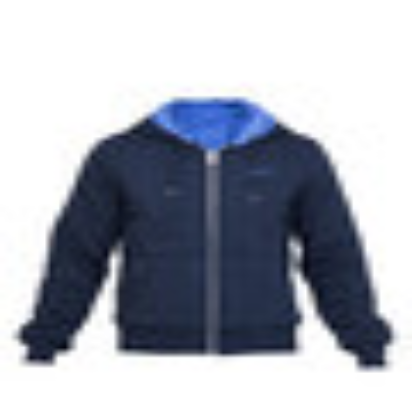

images/22373.jpg


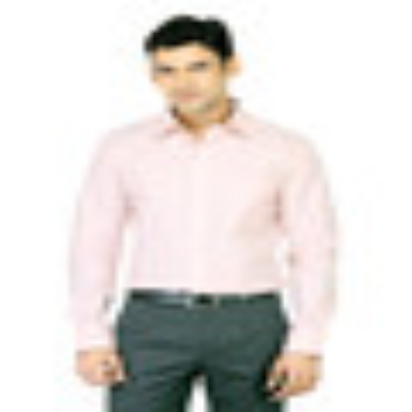

images/20197.jpg


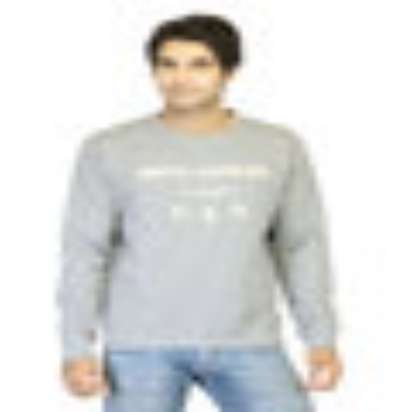

images/23146.jpg


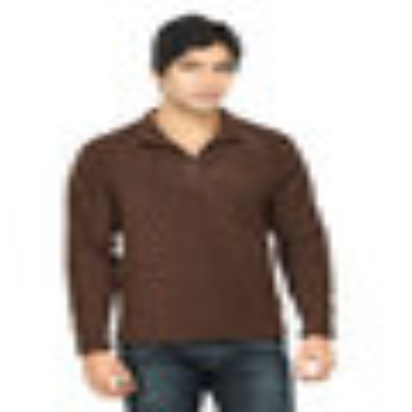

images/4423.jpg


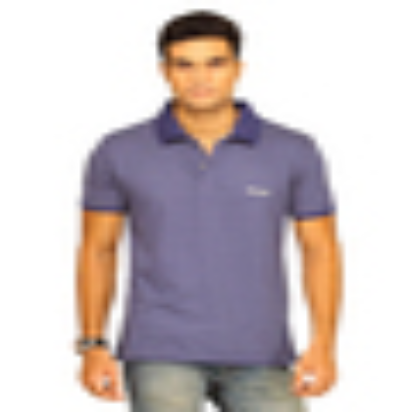

In [ ]:
# sample image to test
img = image.load_img('/content/Shirt image.jpg',target_size=(224,224))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array,axis=0)
preprocessed_img = preprocess_input(expanded_img_array)
result = model.predict(preprocessed_img).flatten()
normalized_result = result/norm(result)

# Finding nearest Neighbours of uploaded image file
from sklearn.neighbors import NearestNeighbors
import cv2
from google.colab.patches import cv2_imshow

neighbors = NearestNeighbors(n_neighbors=5,algorithm='brute',metric='euclidean')
neighbors.fit(feature_list)

distances,indices = neighbors.kneighbors([normalized_result])
print(indices)

for file in indices[0]:
  print (filenames[file])
  temp_img=cv2.imread(filenames[file])
  cv2_imshow(cv2.resize(temp_img,(412,412)))
#cv2.waitkey(0)

In [ ]:
# Extracting the features of test image (option 2)
sample_img_features = extract_features('/content/Shirt image.jpg',model)

1/1 [==============================] - 0s 209ms/step


In [ ]:
# Finding nearest Neighbours of uploaded image file
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5,algorithm='brute',metric='euclidean')
neighbors.fit(feature_list)

distances,indices = neighbors.kneighbors([sample_img_features])
print(indices)

for file in indices[0]:
  print(filenames[file])

[[347 471 383 101 331]]
images/15319.jpg
images/22373.jpg
images/20197.jpg
images/23146.jpg
images/4423.jpg


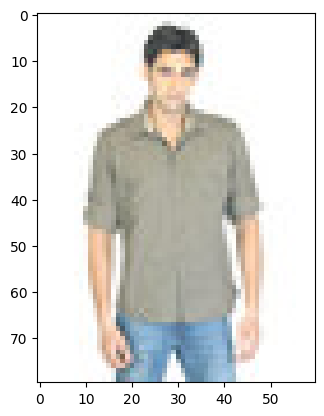

In [ ]:
# Showing Images
import cv2
import matplotlib.pyplot as plt
test_img = cv2.imread('images/27550.jpg')
rgb_image = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import os
from PIL import Image
import numpy as np
import pickle
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import GlobalMaxPooling2D
from keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.neighbors import NearestNeighbors
from numpy.linalg import norm
from tqdm import tqdm

feature_list = np.array(pickle.load(open('embeddings.pkl','rb')))
filenames = pickle.load(open('filenames.pkl','rb'))


model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False
model = tensorflow.keras.Sequential([model,GlobalMaxPooling2D()])

In [ ]:
st.title('fashion recommender system')

2023-09-22 09:45:57.058 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [ ]:
#!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py


In [ ]:
def save_uploaded_file():
  try:
    with open(os.path.join('uploads',uploaded_file.name),'wb') as f:
      f.write(uploaded_file.getbuffer())
    return 1
  except:
    return 0

def feature_extraction(img_path,model):
  img = image.load_img(img_path,target_size=(224,224))
  img_array = image.img_to_array(img)
  expanded_img_array = np.expand_dims(img_array,axis=0)
  preprocessed_img = preprocess_input(expanded_img_array)
  result = model.predict(preprocessed_img).flatten()
  normalized_result = result/norm(result)

  return normalized_result

def recommend(features,feature_list):
  neighbors = NearestNeighbors(n_neighbors=5,algorithm='brute',metric='euclidean')
  neighbors.fit(feature_list)

  distances,indices = neighbors.kneighbors([features])

  return indices


In [ ]:
#steps
#file upload-save
uploaded_file = st.file_uploader("Choose a file")
if uploaded_file is not None:
    if save_uploaded_file(uploaded_file):
      print('file has been uploaded')
      #display the file
      display_image=Image.open(uploaded_file)
      st.image(display_image)
      #feature extract
      features=feature_extraction(os.path.join('uploads',uploaded_file.name),model)
      #st.text(features)

      #recommend
      indices=recommend(features,feature_list)

      #show
      col1,col2,col3,col4,col5=st.beta_columns(5)

      with col1:
        st.image(filenames[indices[0][0]])
      with col2:
        st.image(filenames[indices[0][1]])
      with col3:
        st.image(filenames[indices[0][2]])
      with col4:
        st.image(filenames[indices[0][3]])
      with col5:
        st.image(filenames[indices[0][4]])



    else:
      st.header('some error occured in file upload')

#load file- feature extract
#recommend
#show

In [ ]:
!wget -q -O - ipv4.icanhazip.com

35.185.159.22


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[##................] - fetchMetadata: sill resolveWithNewModule y18n@5.0.8 chec

npx: installed 22 in 6.172s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.185.159.22:8501

your url is: https://tiny-cycles-wonder.loca.lt
